<a href="https://colab.research.google.com/github/WojciechBrzoskaPrv/ML_BOOTCAMP/blob/main/linearRegressionTrainingvsTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)
print('x_train{} x_test{}'.format(x_train.shape,x_test.shape))
print('y_train{} y_test{}'.format(y_train.shape,y_test.shape))


x_train(750, 1) x_test(250, 1)
y_train(750,) y_test(250,)


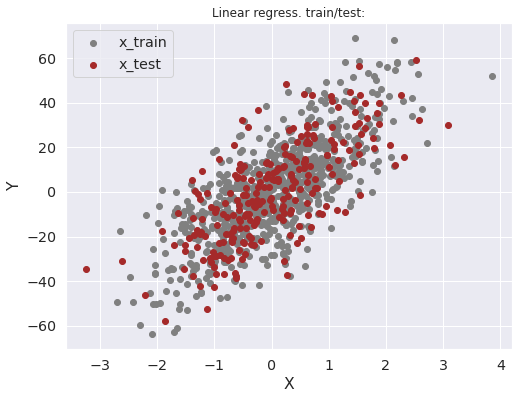

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Linear regress. train/test:',{'fontsize':12})
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train, y_train, label='x_train',color='grey')
plt.scatter(x_test, y_test, label='x_test',color='brown')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
attr_methods=[item for item in dir(regressor) if item[:1]!='_']
for anyItem in attr_methods:
  print(anyItem)
a=regressor.coef_[0]
b=regressor.intercept_
R2_train=regressor.score(x_train,y_train)
R2_test=regressor.score(x_test,y_test)
print(R2_train,R2_test)


coef_
copy_X
fit
fit_intercept
get_params
intercept_
n_features_in_
n_jobs
normalize
positive
predict
rank_
score
set_params
singular_
0.5550440098049001 0.5108438585354155


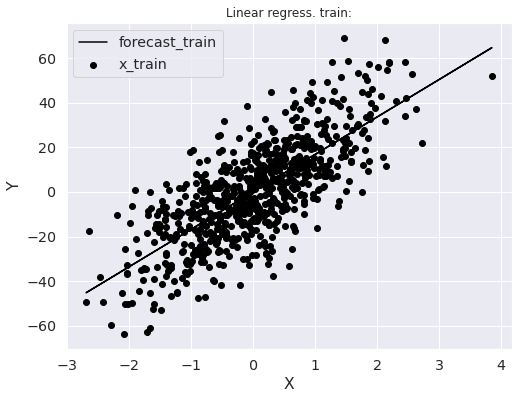

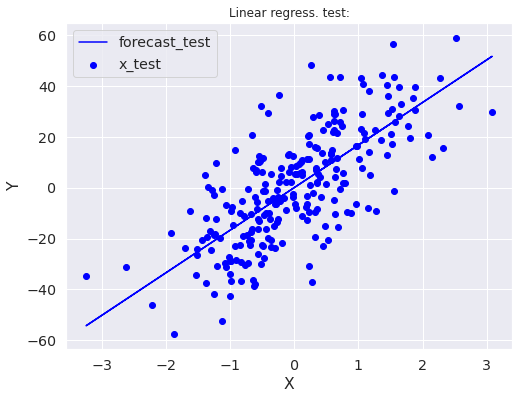

In [21]:
forecast_train=regressor.predict(x_train)
forecast_test=regressor.predict(x_test)

plt.figure(figsize=(8, 6))
plt.title('Linear regress. train:',{'fontsize':12})
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(x_train, y_train, label='x_train',color='black')

plt.plot(x_train, forecast_train, label='forecast_train',color='black')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Linear regress. test:',{'fontsize':12})
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_test, y_test, label='x_test',color='blue')
plt.plot(x_test, forecast_test, label='forecast_test',color='blue')

plt.legend()
plt.show()

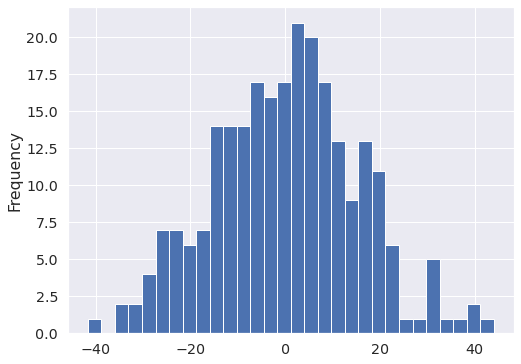

In [24]:
myPredict=pd.DataFrame(data={'y_true':y_test,'y_predict':forecast_test})
myPredict['error']=myPredict['y_true']-myPredict['y_predict']
myPredict.head()
_=myPredict['error'].plot(kind='hist',bins=30,figsize=(8,6))
